# Bank Classification Project

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Bank client data:


Age (numeric)


Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')


Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)


Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')


Default: has credit in default? (categorical: 'no', 'yes', 'unknown')


Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')


Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')


Related with the last contact of the current campaign:
Contact: contact communication type (categorical:
'cellular','telephone')


Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')


Day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.


Other attributes:


Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)


Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)


Previous: number of contacts performed before this campaign and for
this client (numeric)


Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')


Social and economic context attributes


Emp.var.rate: employment variation rate - quarterly indicator
(numeric)


Cons.price.idx: consumer price index - monthly indicator (numeric)


Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)


Euribor3m: euribor 3 month rate - daily indicator (numeric)
Nr.employed: number of employees - quarterly indicator (numeric)


Output variable (desired target):


y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [1]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Loading our data 

In [2]:
data= pd.read_csv('bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis 

In [3]:
#Getting some information about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#Checking for missing values 
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
#Shape of our data
data.shape

(41188, 21)

In [6]:
#Statistical description of our data 
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

<AxesSubplot:title={'center':'Distribution'}>

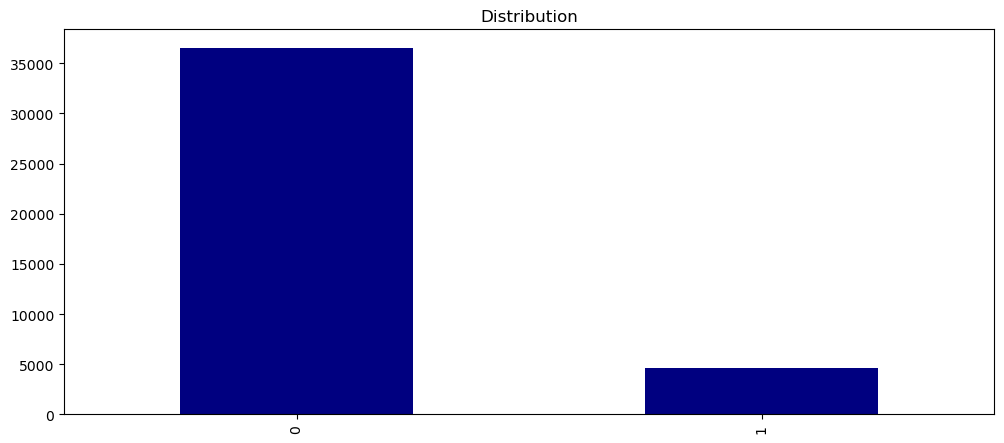

In [64]:
#Checking our data distribution 
data['y'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 5), 
                                 title = 'Distribution', 
                                 cmap = 'jet')

In [9]:
data["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

<AxesSubplot:title={'center':'Distribution'}>

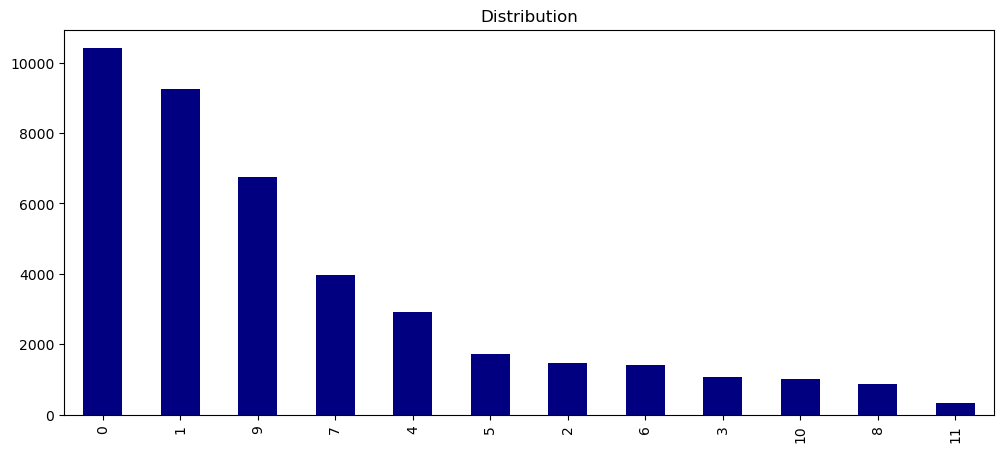

In [63]:
#Checking our data distribution for the feature column 
data['job'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 5), 
                                 title = 'Distribution', 
                                 cmap = 'jet')

In [11]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

<AxesSubplot:title={'center':'Distribution'}>

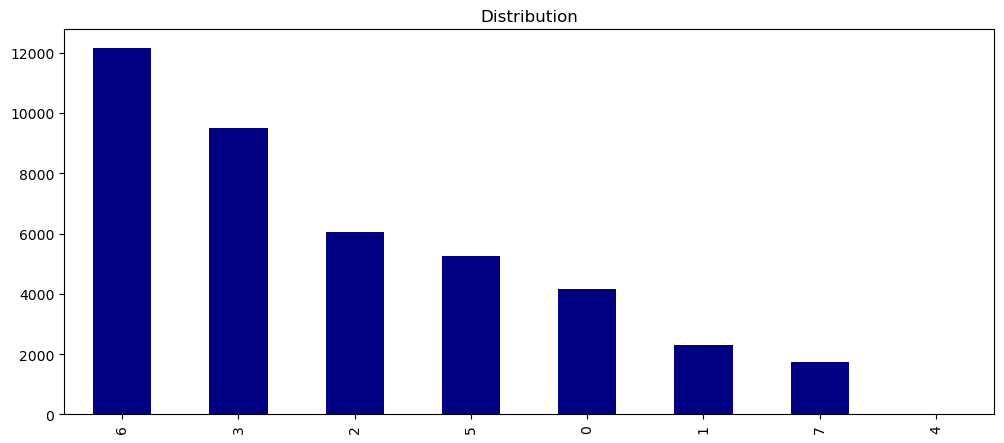

In [61]:
#Checking our data distribution for the feature column 
data['education'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 5), 
                                 title = 'Distribution', 
                                 cmap = 'jet')

In [13]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

<AxesSubplot:title={'center':'Distribution'}>

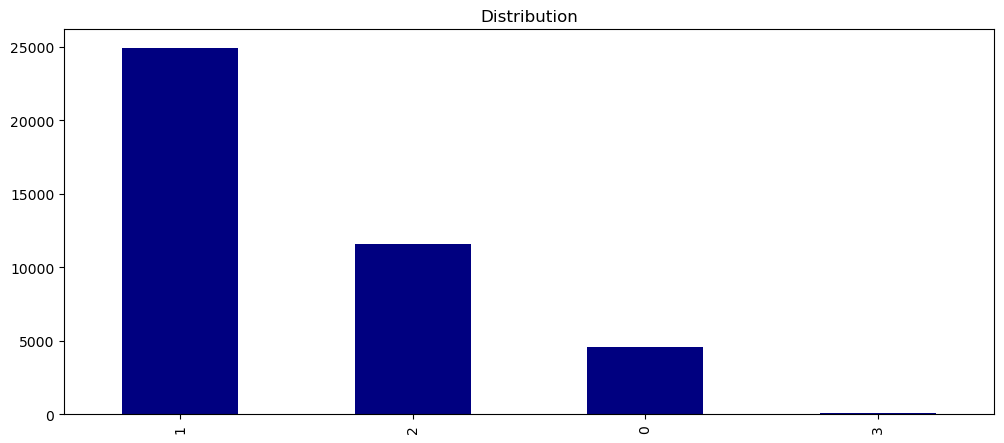

In [62]:
data['marital'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 5), 
                                 title = 'Distribution', 
                                 cmap = 'jet')

<AxesSubplot:>

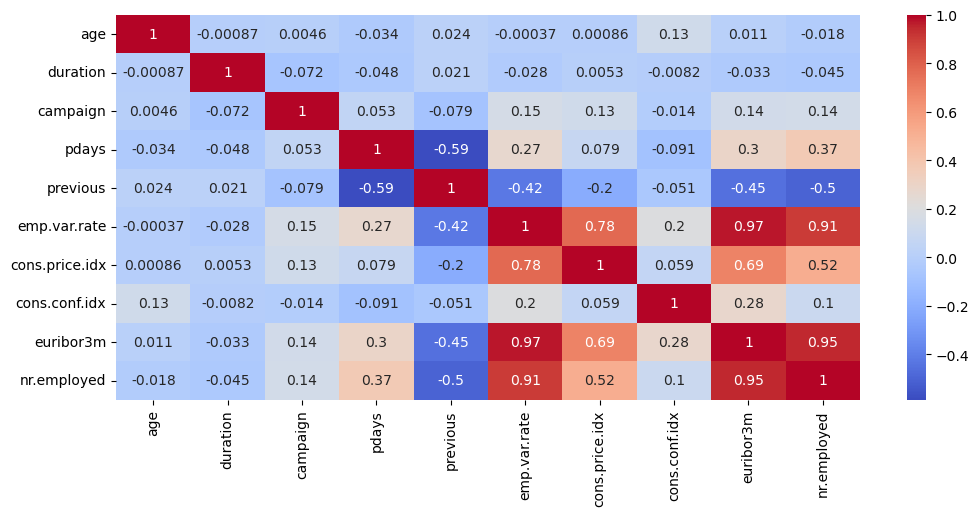

In [16]:
#Season visualisation, understanding the correlation matrix of our features 
plt.figure(figsize = (12, 5))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'coolwarm')

In [17]:
#the number of attracted married clients is 2532
pd.crosstab(data["y"], data["marital"])

marital,divorced,married,single,unknown
y,,,,
no,4136,22396,9948,68
yes,476,2532,1620,12


In [18]:
#A pivot table that will give us a mean of our selected features 
data.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.187296,254.312128
blue-collar,39.555760,264.542360
entrepreneur,41.723214,263.267857
housemaid,45.500000,250.454717
management,42.362859,257.058140
retired,62.027326,273.712209
self-employed,39.949331,264.142153
services,37.926430,258.398085
student,25.894857,283.683429


In [19]:
data.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count"],
)

mean            count         
                           age  campaign    age campaign
education                                               
basic.4y             47.596504  2.600575   4176     4176
basic.6y             40.448953  2.556283   2292     2292
basic.9y             39.061208  2.532341   6045     6045
high.school          37.998213  2.568576   9515     9515
illiterate           48.500000  2.277778     18       18
professional.course  40.080107  2.586115   5243     5243
university.degree    38.879191  2.563527  12168    12168
unknown              43.481225  2.596187   1731     1731

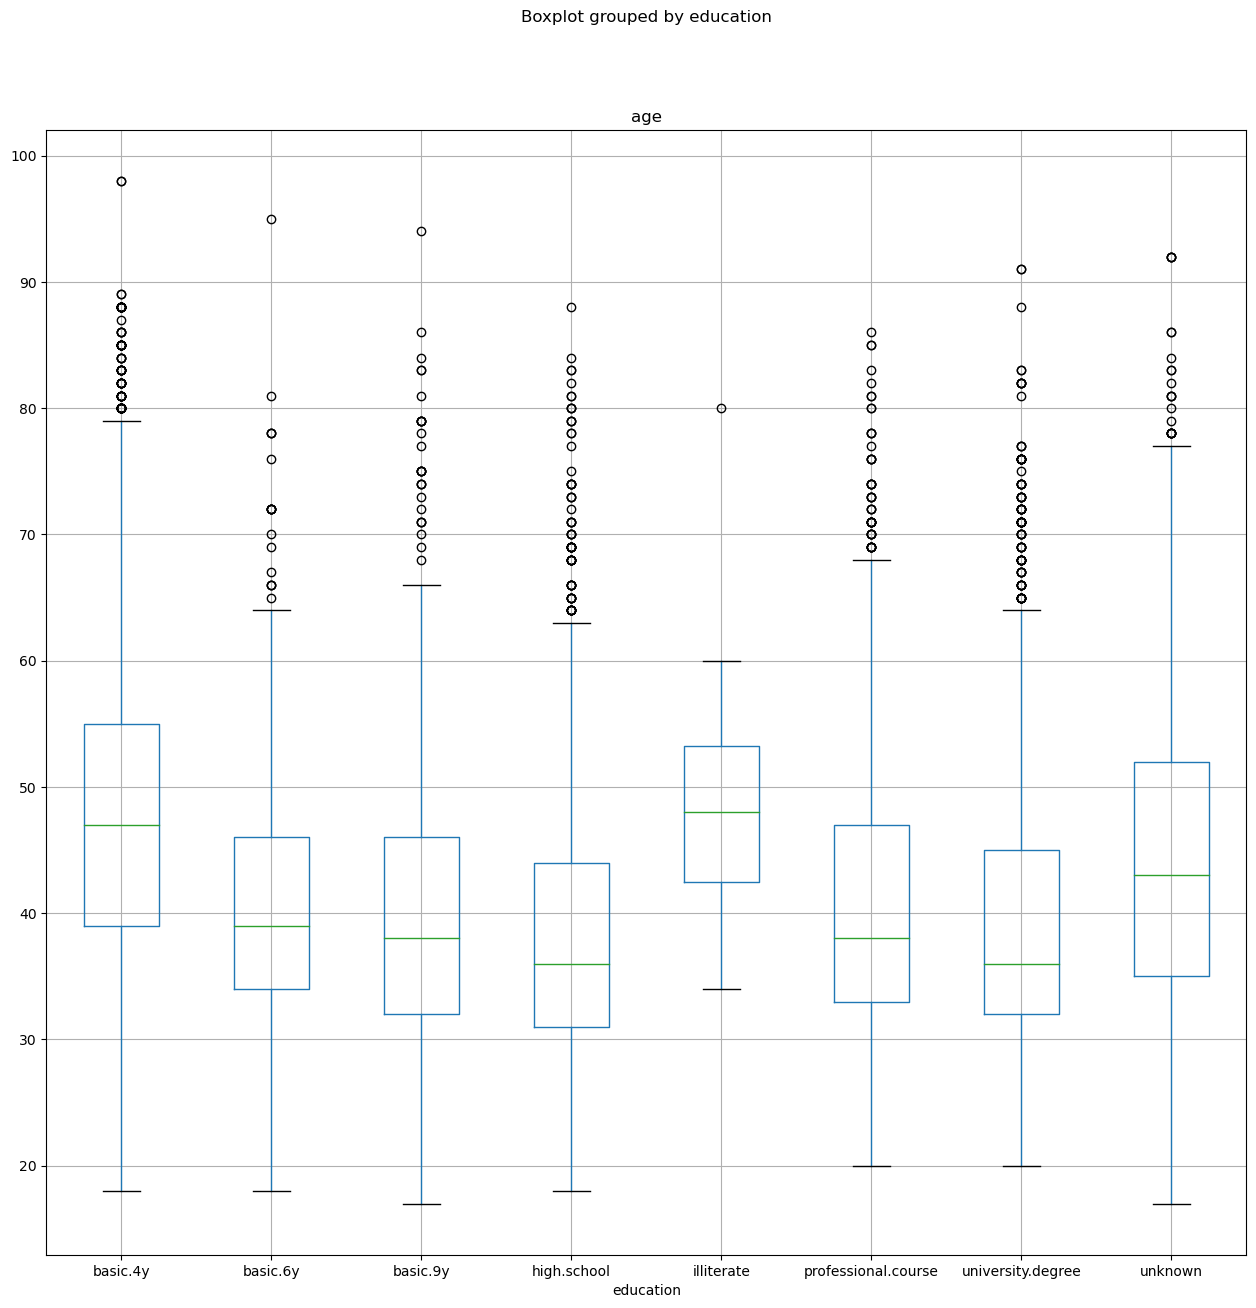

In [20]:
#Boxplot visualisation, visualizing age column by their level of education 
data.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))
plt.show()

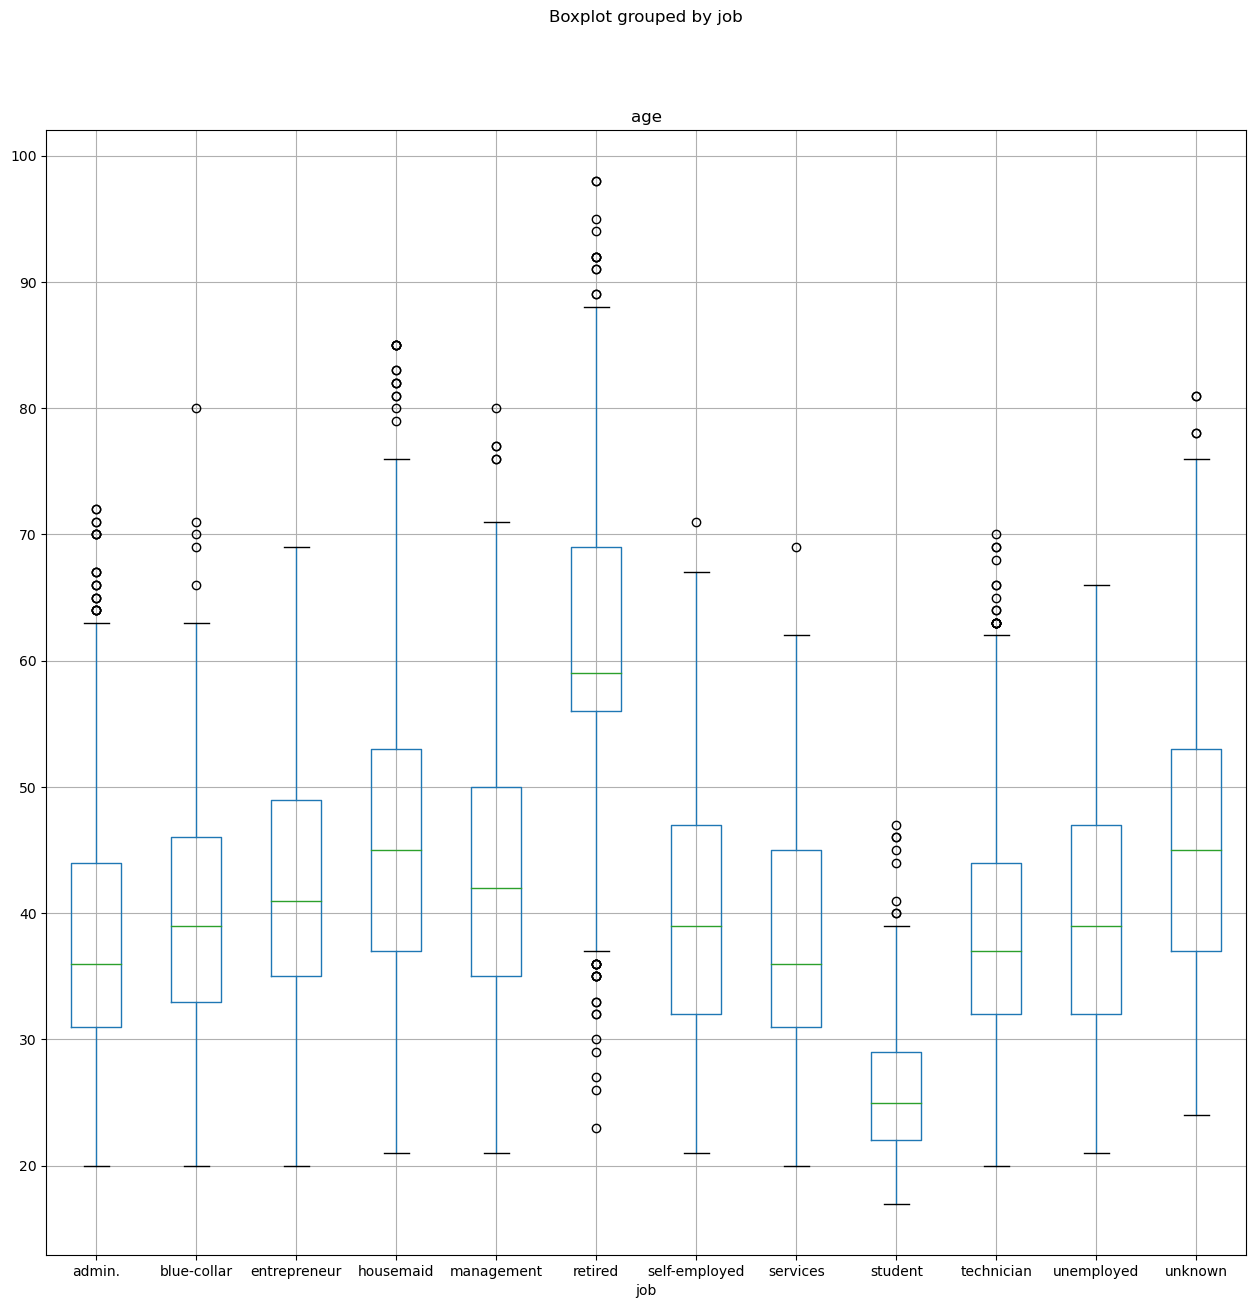

In [21]:
#Boxplot visualisation, visualizing age column by their level of education 
data.boxplot(column = "age",
  by = "job",
  figsize = (15, 15))
plt.show()

# Feature engineering 

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [24]:
#dropping features that we will not need in building a prediction model 
data= data.drop(['nr.employed', 'euribor3m', 'cons.price.idx', 'cons.price.idx','emp.var.rate', 'duration', ],axis = 1 )
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,-36.4,no


In [25]:
data.drop('cons.conf.idx', axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,-36.4,no


In [26]:
data.drop('cons.conf.idx', axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,-36.4,no


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41188 non-null  int64  
 1   job            41188 non-null  object 
 2   marital        41188 non-null  object 
 3   education      41188 non-null  object 
 4   default        41188 non-null  object 
 5   housing        41188 non-null  object 
 6   loan           41188 non-null  object 
 7   contact        41188 non-null  object 
 8   month          41188 non-null  object 
 9   day_of_week    41188 non-null  object 
 10  campaign       41188 non-null  int64  
 11  pdays          41188 non-null  int64  
 12  previous       41188 non-null  int64  
 13  poutcome       41188 non-null  object 
 14  cons.conf.idx  41188 non-null  float64
 15  y              41188 non-null  object 
dtypes: float64(1), int64(4), object(11)
memory usage: 5.0+ MB


### Converting categorical data to numerical data 

In [28]:
df_categorical= data.select_dtypes(object)
df_numerical=data.select_dtypes(np.number)

In [29]:
df_numerical = df_numerical.drop('cons.conf.idx', axis=1)

In [30]:
df_numerical.head()

,age,campaign,pdays,previous
0,56,1,999,0
1,57,1,999,0
2,37,1,999,0
3,40,1,999,0
4,56,1,999,0


In [31]:
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [32]:
from sklearn.preprocessing import LabelEncoder
for col in df_categorical:
    le = LabelEncoder()
    df_categorical[col]=le.fit_transform(df_categorical[col])

In [33]:
 df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0


In [34]:
data = pd.concat([ df_categorical,df_numerical], axis=1, join='inner')
display(data)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age,campaign,pdays,previous
0,3,1,0,0,0,0,1,6,1,1,0,56,1,999,0
1,7,1,3,1,0,0,1,6,1,1,0,57,1,999,0
2,7,1,3,0,2,0,1,6,1,1,0,37,1,999,0
3,0,1,1,0,0,0,1,6,1,1,0,40,1,999,0
4,7,1,3,0,0,2,1,6,1,1,0,56,1,999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1,1,73,1,999,0
41184,1,1,5,0,0,0,0,7,0,1,0,46,1,999,0
41185,5,1,6,0,2,0,0,7,0,1,0,56,2,999,0
41186,9,1,5,0,0,0,0,7,0,1,1,44,1,999,0


In [35]:
data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age,campaign,pdays,previous
0,3,1,0,0,0,0,1,6,1,1,0,56,1,999,0
1,7,1,3,1,0,0,1,6,1,1,0,57,1,999,0
2,7,1,3,0,2,0,1,6,1,1,0,37,1,999,0
3,0,1,1,0,0,0,1,6,1,1,0,40,1,999,0
4,7,1,3,0,0,2,1,6,1,1,0,56,1,999,0


## Unsupervised algorithms

In [36]:
X = data.drop('y', axis=1)
y = data['y']

In [37]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

### 1) Decision Tree Model 

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 82.68997329448895 %


### 2) Random Forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 89.36635105608157 %


### 3) Support Vector Machine 

In [42]:
from sklearn import svm
svm = svm.SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True)
svm.fit(X_train, y_train)

SVC(C=1000000000.0, gamma=1e-07, probability=True)

In [43]:
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 90.07040543821316 %


### 4) XGBoost 

In [44]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 89.26924010682204 %


In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [47]:
# Predict the labels for the test set
y_prediction = gnb.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_prediction)*100, "%")

Accuracy Score : 84.24374848264142 %


In [48]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=7) 
  
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [49]:
y_prediction = knn.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_prediction)*100, "%")

Accuracy Score : 89.48773974265598 %


In [50]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
X = data.drop('y', axis=1)
y = data['y']
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)
# create logistic regression object
reg = linear_model.LogisticRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)

# making predictions on the testing set
y_pred = reg.predict(X_test)
 
# comparing actual response values (y_test)
# with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
      metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 90.14323865015781


logistic regression is a better performing model with Accuracy Score : 90.14323865015781 

### confusion_matrix

In [51]:
#importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix

In [52]:
#Classification report
y_pred = svm.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7333
           1       0.68      0.18      0.28       905

    accuracy                           0.90      8238
   macro avg       0.79      0.58      0.62      8238
weighted avg       0.88      0.90      0.87      8238



Text(0.5, 1.0, 'Accuracy Score: 0.9007040543821316')

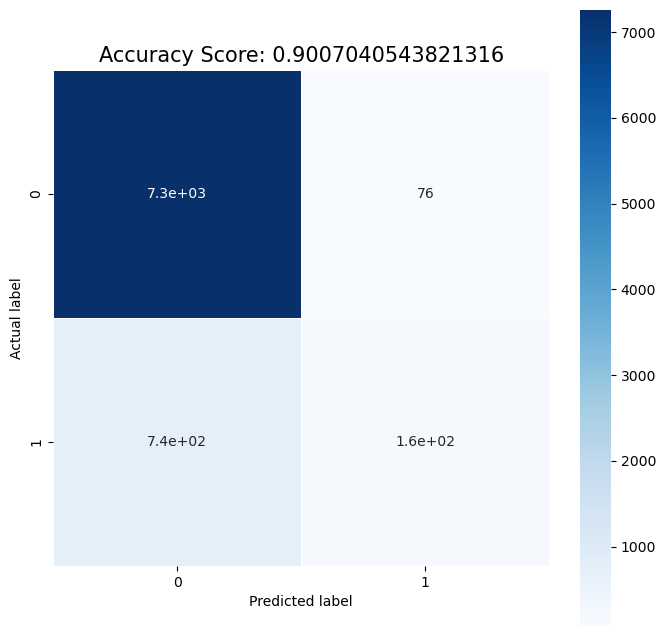

In [53]:
# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(svm.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# Roc Curve Models 

We alreadly know logistic regression is the best performing model, but we want to prove this by using a Roc Curve. 

A Roc Curve allows us to focus on:


1)Sensitivity: The probability that the model predicts a positive outcome for an observation when the outcome is indeed positive.


2)Specificity: The probability that the model predicts a negative outcome for an observation when the outcome is indeed negative.

Once we’ve fit a logistic regression model, we can use the model to classify observations into one of two categories.

For example, we might classify observations as either “positive” or “negative.”

The true positive rate represents the proportion of observations that are predicted to be positive when indeed they are positive.

Conversely, the false positive rate represents the proportion of observations that are predicted to be positive when they’re actually negative.

When we create a ROC curve, we plot pairs of the true positive rate vs. the false positive rate for every possible decision threshold of a logistic regression model.

### Model A= Logistic Regression ROC Curve 

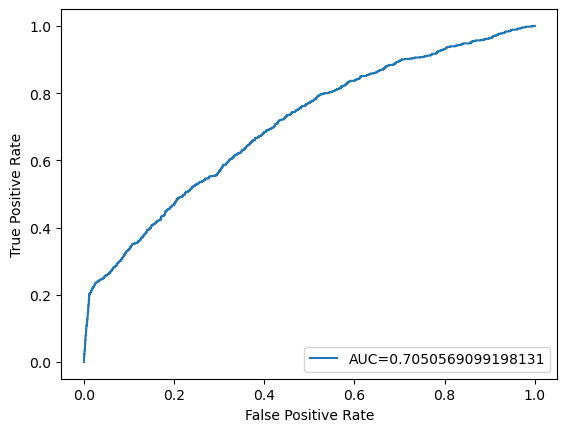

In [57]:
#define metrics
y_pred_proba = reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Model B= K nearest neighbor ROC Curve 

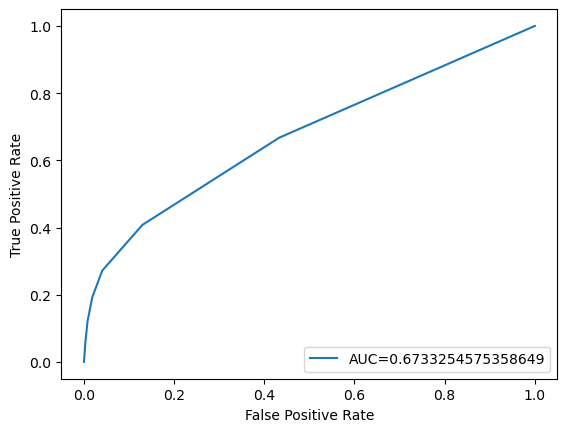

In [58]:
#define metrics
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Model C = Random forest Roc Curve 

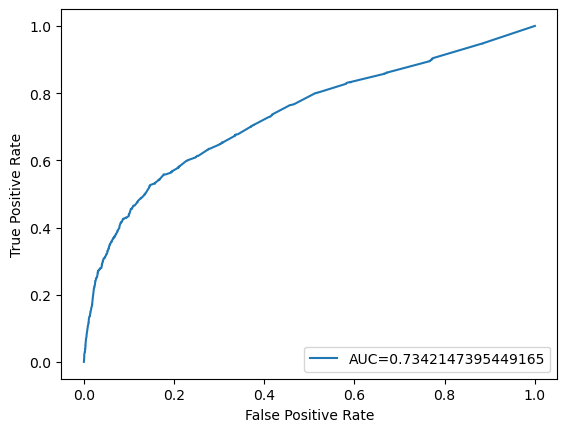

In [59]:
#define metrics
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Conclusion: 
We have 3 models using the Roc Curve and the highest performing ROC is from the random Forest classifier, although the logistic regression gave us a better accuracy. 
#### Model A AUC: 70.5%
#### Model B AUC: 67.3%
#### Model C AUC: 73.4%

The closer AUC is to 1, the better the model. Therefore the better model is the Random forest classifier

# Saving the model 

In [60]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(rfc) 
  
# Load the pickled model 
rfc_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
rfc_from_pickle.predict(X_test) 

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
import pickle 
file = open('random_forest_model.pkl','wb')

#dump information to that file 
pickle.dump(rfc, file)